<a href="https://colab.research.google.com/github/harshadbhale/TSF-Task-1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION**

###**TASK 1 - Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied



###**Author - Harshad Sudam Bhale**

**Import Libraries**

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

**Import Dataset**

In [39]:
dataset_url = "http://bit.ly/w-data"
df = pd.read_csv(dataset_url)
print("Dataset imported successfully!")

Dataset imported successfully!


In [40]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [41]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [43]:
# Check if there any null value in the Dataset
df.isnull == True

False

#**Data Visualization**

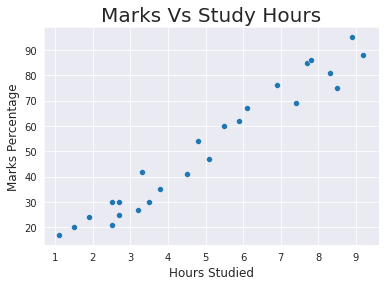

In [44]:
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

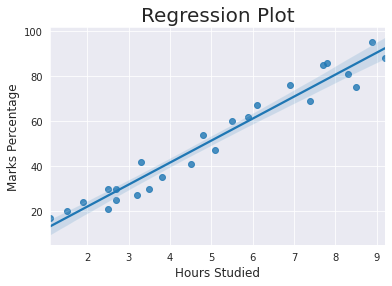

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [45]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(df.corr())

#**Training the Model**

###**1) Splitting the Data**

In [46]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

###**2) Fitting the Data into the model**

In [47]:
l = LinearRegression()
l.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


##**Predicting the Percentage of Marks**

In [48]:
pred_y = l.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


##**Visually Comparing the Predicted Marks with the Actual Marks**

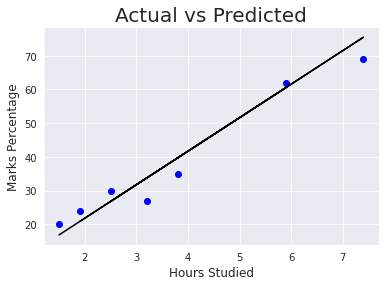

In [49]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#**Evaluating the Model**

In [50]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


#****What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?****

In [53]:
hours =[[9.25]]
pred_value = l.predict(hours)
print('Number of total hours : {}'.format(hours))
print('Predicted Score : {}'.format(pred_value[0]))

Number of total hours : [[9.25]]
Predicted Score : 93.89272889341652


#**Predicted Score 93.89**